In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("insurance.csv") 
df.head()
df1 = df.copy() 

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe(exclude = 'object').style.background_gradient(cmap='BuPu')

# This method provides a transposed summary of the descriptive statistics for a pandas DataFrame, including count, mean, standard deviation, 
# min, 25th percentile, median, 75th percentile, and max for numerical columns.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
##Relation between Age and medical expense

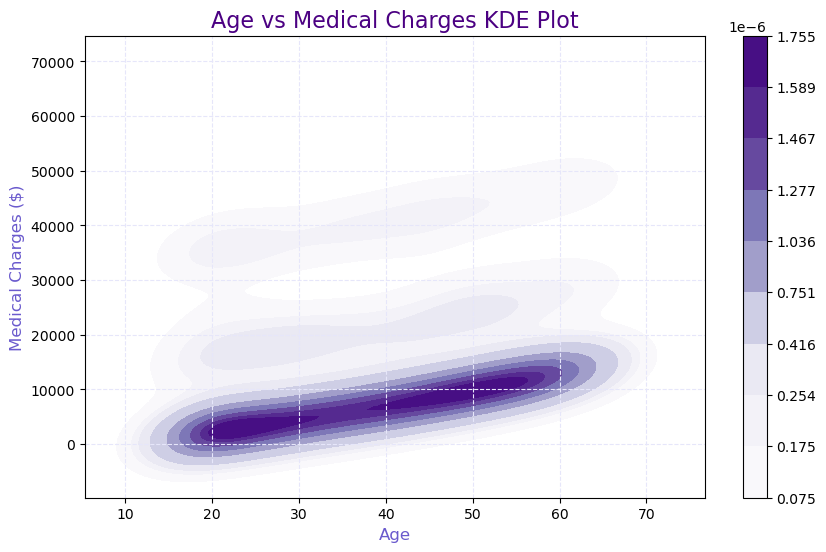

In [6]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df, 
    x="age", 
    y="charges", 
    cmap="Purples", 
    shade=True,     
    cbar=True       
)

plt.title("Age vs Medical Charges KDE Plot", fontsize=16, color='indigo')
plt.xlabel("Age", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, color='lavender', linestyle='--')
plt.show()

In [7]:
##Gender and Average Medical Expenses

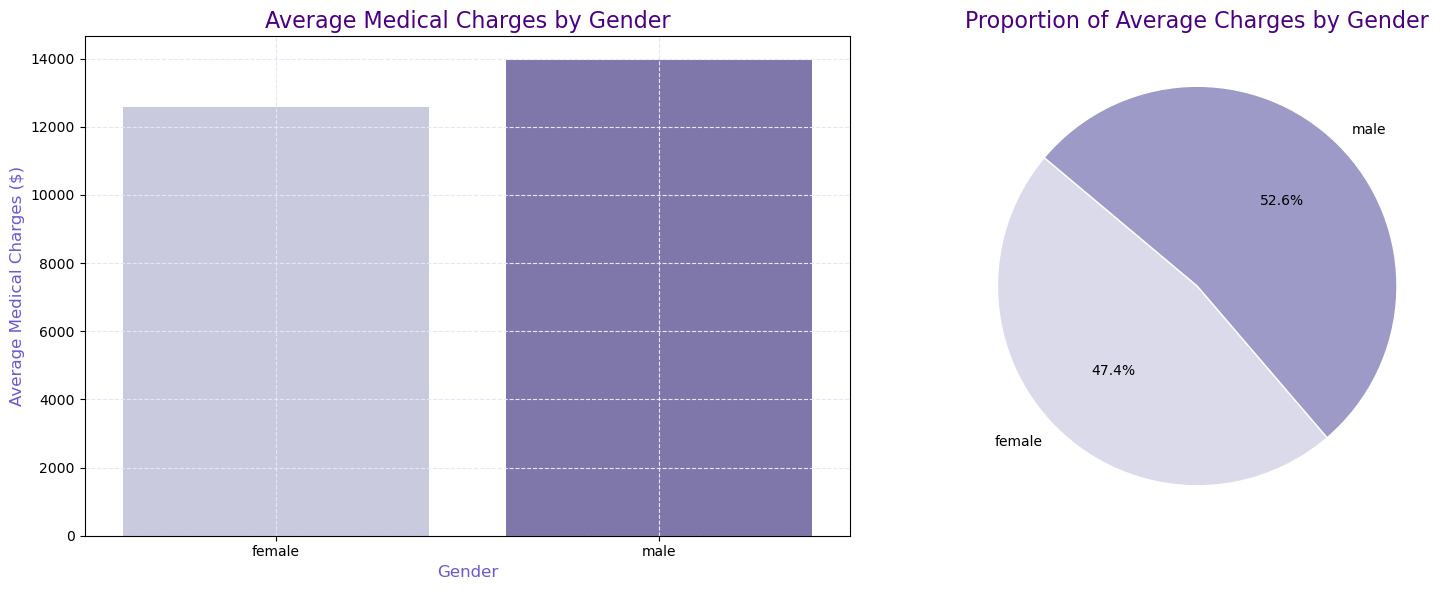

In [8]:
average_charges_by_sex = df.groupby('sex')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 
colors = sns.color_palette("Purples", 3) 
# Sütun grafiği
sns.barplot(ax=axes[0], data=average_charges_by_sex, x="sex", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Gender", fontsize=16, color='indigo')
axes[0].set_xlabel("Gender", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')


axes[1].pie(
    average_charges_by_sex['charges'], 
    labels=average_charges_by_sex['sex'], 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Average Charges by Gender", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()


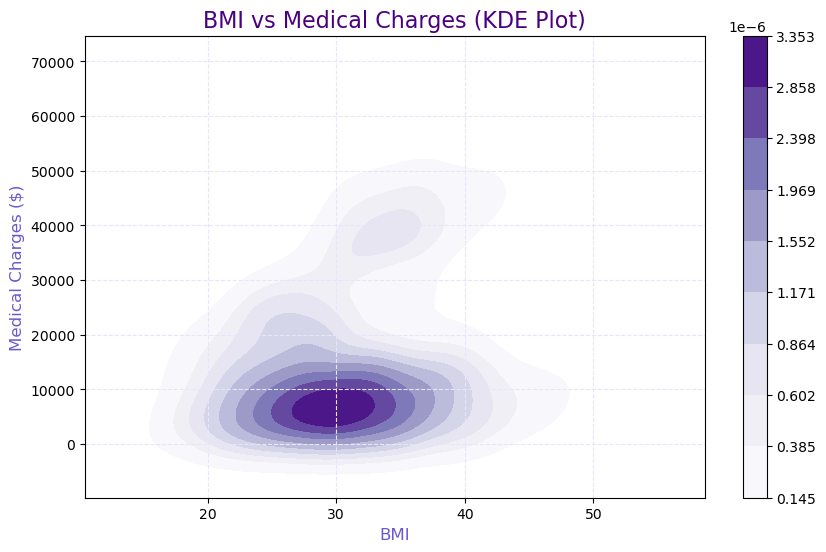

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df, 
    x="bmi", 
    y="charges", 
    cmap="Purples", 
    shade=True,     
    cbar=True        
)
plt.title("BMI vs Medical Charges (KDE Plot)", fontsize=16, color='indigo')
plt.xlabel("BMI", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, color='lavender', linestyle='--')
plt.show()

In [10]:
##Comparison of Smokers and Non-Smokers

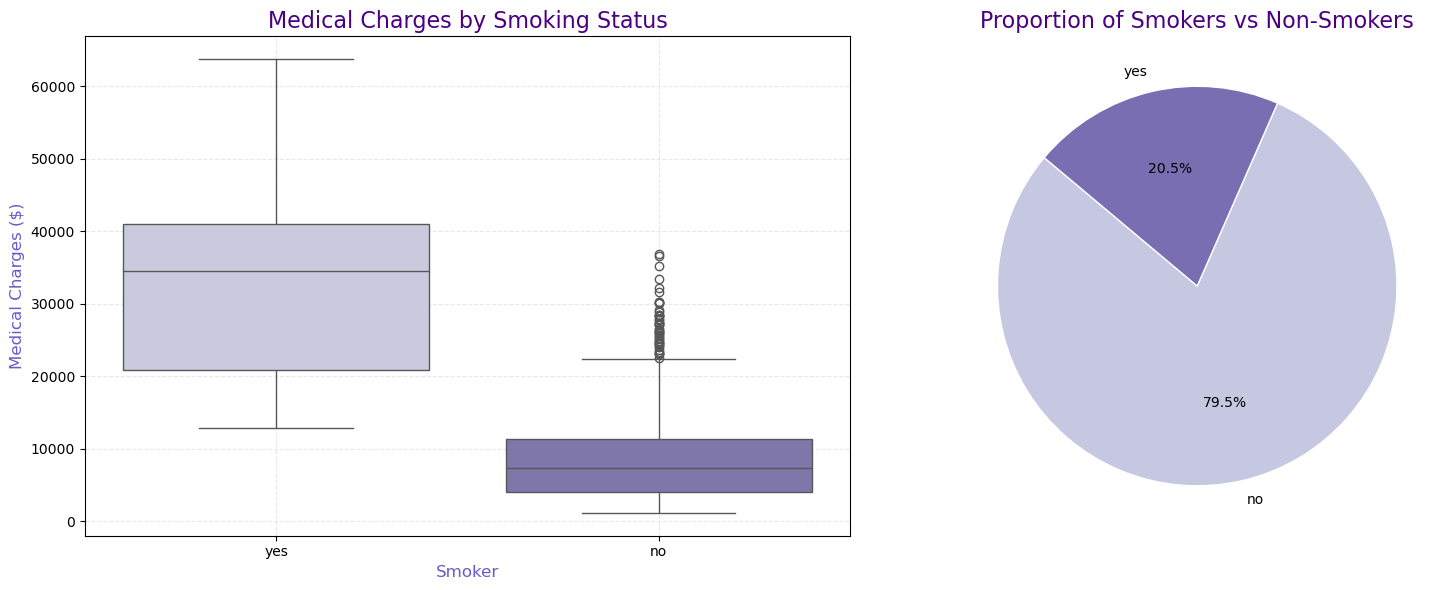

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Purples", 2)  

sns.boxplot(ax=axes[0], data=df, x="smoker", y="charges", palette="Purples")
axes[0].set_title("Medical Charges by Smoking Status", fontsize=16, color='indigo')
axes[0].set_xlabel("Smoker", fontsize=12, color='slateblue')
axes[0].set_ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

smoker_counts = df['smoker'].value_counts()
axes[1].pie(
    smoker_counts, 
    labels=smoker_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Smokers vs Non-Smokers", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()

In [12]:
##Cost Analysis by Region

In [13]:
##Relationship Between Number of Children and Expenses

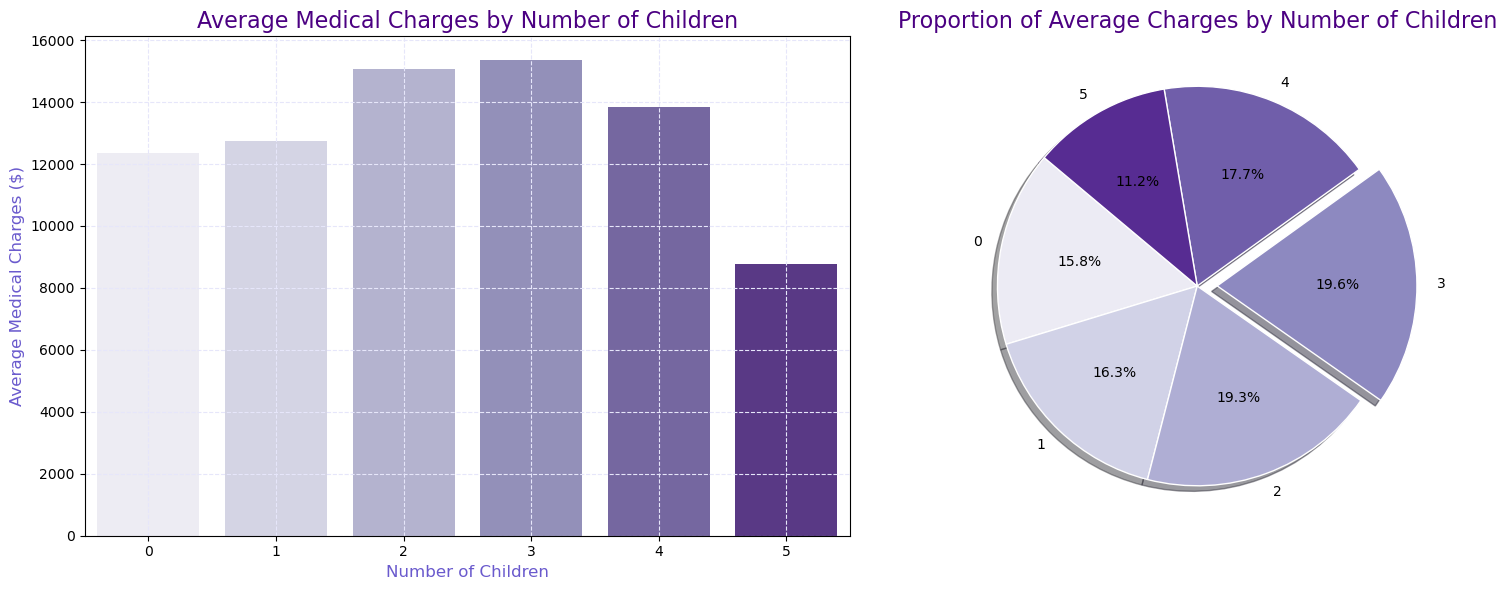

In [14]:
average_charges_by_children = df.groupby('children')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  
colors = sns.color_palette("Purples", len(average_charges_by_children))  


sns.barplot(ax=axes[0], data=average_charges_by_children, x="children", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Number of Children", fontsize=16, color='indigo')
axes[0].set_xlabel("Number of Children", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

charges = average_charges_by_children['charges']
children = average_charges_by_children['children']
explode = [0.1 if i == charges.idxmax() else 0 for i in range(len(charges))] 
axes[1].pie(
    charges, 
    labels=children, 
    autopct='%1.1f%%', 
    colors=colors, 
    explode=explode, 
    shadow=True, 
    startangle=140, 
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Average Charges by Number of Children", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()

In [15]:
##Combined Effect of Smoking, BMI and Expenses

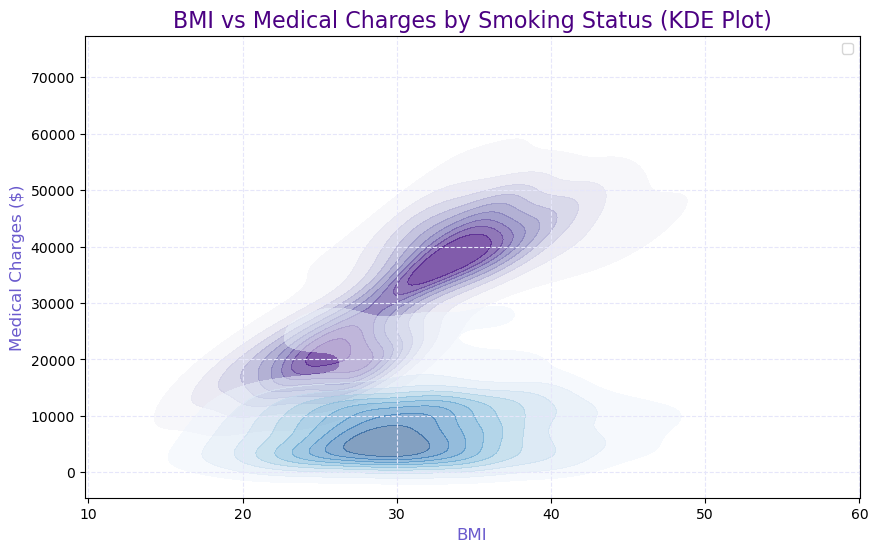

In [16]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=df[df['smoker'] == 'yes'], 
    x="bmi", 
    y="charges", 
    cmap="Purples",  
    shade=True, 
    alpha=0.7, 
    label="Smoker",
    linewidth=2
)

sns.kdeplot(
    data=df[df['smoker'] == 'no'], 
    x="bmi", 
    y="charges", 
    cmap="Blues",  
    shade=True, 
    alpha=0.5, 
    label="Non-Smoker",
    linewidth=2
)

plt.title("BMI vs Medical Charges by Smoking Status (KDE Plot)", fontsize=16, color='indigo')
plt.xlabel("BMI", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, linestyle='--', color='lavender')
plt.legend()
plt.show()

In [17]:
##Scatter plot of Smoking, BMI, Age and Expenses

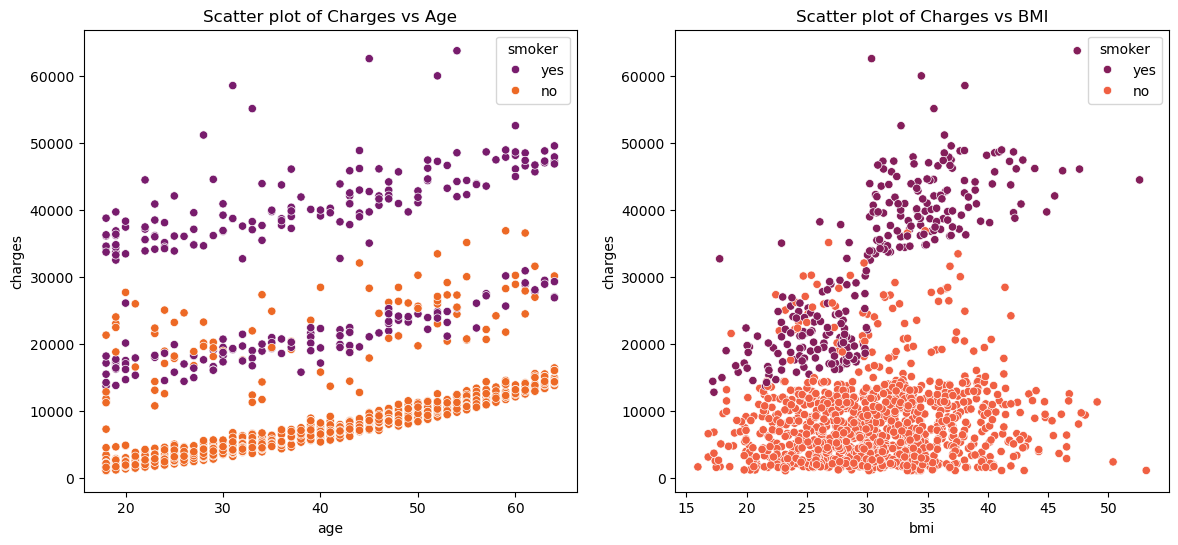

In [18]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.scatterplot(x='age', y='charges', data=df, palette='inferno', hue='smoker', ax=ax)
ax.set_title('Scatter plot of Charges vs Age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', data=df, palette='rocket', hue='smoker')
ax.set_title('Scatter plot of Charges vs BMI')

plt.savefig('sc.png')
plt.show()

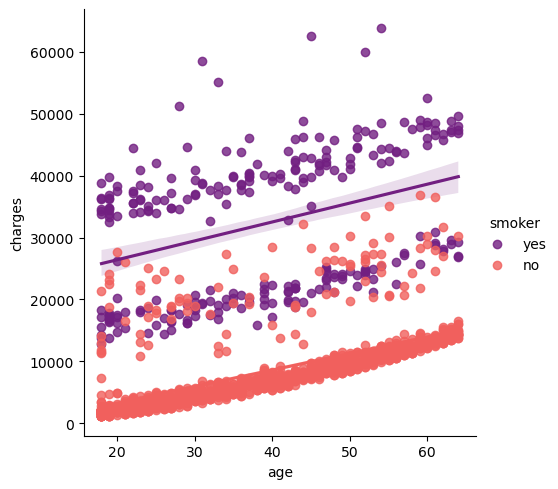

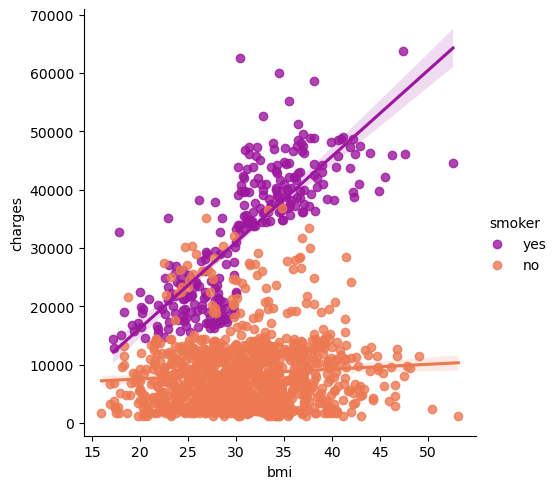

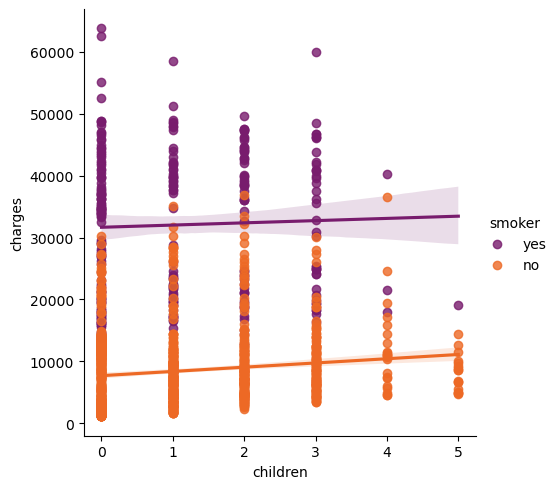

In [19]:
ax = sns.lmplot(x='age', y='charges', data=df, hue='smoker', palette='magma')
ax = sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='plasma')
ax = sns.lmplot(x='children', y='charges', data=df, hue='smoker', palette='inferno')

In [20]:
##Data Preprocessing - Encoding

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
# Dummy variable
categorical_columns = ['sex', 'smoker', ]
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')
df_encode.head()

,age,bmi,children,region,charges,OHE_male,OHE_yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [23]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'children' 'region' 'charges' 'OHE_male' 'OHE_yes']

Number of rows and columns in the dataset: (1338, 7)


In [24]:
from sklearn.model_selection import train_test_split
X = df_encode.drop(['charges','region'],axis=1) # Independet variable
Y = df_encode['charges'] # dependent variable

In [25]:
##Standardize the variables

In [26]:
Y=np.array((Y-Y.mean())/Y.std())
# List of columns to standardize
cols_to_standardize = ['age', 'bmi', 'children']
# Standardize only those columns
X[cols_to_standardize] = X[cols_to_standardize].apply(lambda col: (col - col.mean()) / col.std())
# add 1 into the data
X_0=np.c_[np.ones((X.shape[0],1)),X] ## add x0 = 1
X_train, X_test, Y_train, Y_test = train_test_split(X_0,Y,test_size=0.2,random_state=101)

In [27]:
import random
def initialize(dim):
    theta=np.random.rand(dim)
    return theta
theta=initialize(6)

In [28]:
def predict_Y(theta,X_0):
    return  np.dot(X_0,theta)
Y_hat=predict_Y(theta,X_0)

In [29]:
import math
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
def update_theta(x,y,y_hat,theta_o,learning_rate):
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    theta_1=theta_o-learning_rate*dw
    return theta_1

In [30]:
theta=update_theta(X_0,Y,Y_hat,theta,0.01)
print("After initialization:",theta)

After initialization: [0.06030827 0.21152559 0.45509173 0.17318847 0.74156489 0.12381374]


In [31]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for each_iter in range(num_iterations):
        Y_hat=predict_Y(theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_theta=theta
        theta=update_theta(X,Y,Y_hat,prev_theta,alpha)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
        iter_num +=1
    print("Final Estimate of theta : ",theta)
    return gd_iterations_df,theta

Final Estimate of theta :  [-0.40729929  0.28448632  0.17451074  0.04202123  0.00788768  1.9513045 ]


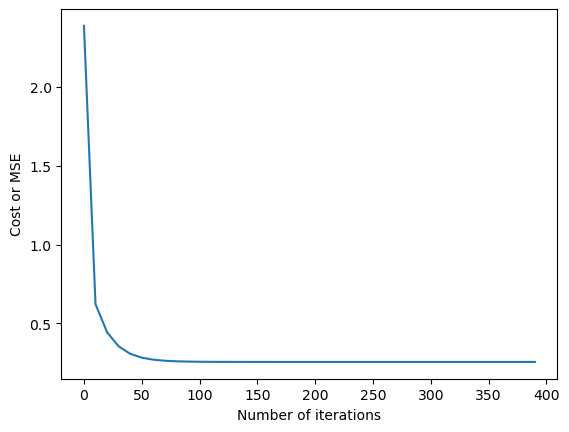

    iteration      cost
35      350.0  0.255947
36      360.0  0.255947
37      370.0  0.255947
38      380.0  0.255947
39      390.0  0.255947


In [32]:
gd_iterations_df,theta=run_gradient_descent(X_train,Y_train,alpha=0.1,num_iterations=400)
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")
plt.show()
print(gd_iterations_df.tail())

In [33]:
Y_test_hat = predict_Y(theta, X_test)
test_cost = get_cost(Y_test, Y_test_hat)

In [34]:
print(f"Test set MSE: {test_cost:.4f}")

Test set MSE: 0.2292


In [35]:
def r2_score(Y_true, Y_pred):
    ss_res = np.sum((Y_true - Y_pred) ** 2)     # Residual sum of squares
    ss_tot = np.sum((Y_true - np.mean(Y_true)) ** 2)  # Total sum of squares
    r2 = 1 - (ss_res / ss_tot)
    return r2

r2 = r2_score(Y_test, Y_test_hat)
print("R² on test data:", r2)

R² on test data: 0.7618253070953243


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7978644236809906


In [38]:
# Create an instance of PolynomialFeatures with degree 2 to generate polynomial features
quad = PolynomialFeatures(degree=2)

# Fit and transform the feature set X to include polynomial features
x_quad = quad.fit_transform(X)

# Split the dataset into training and testing sets
# X_train and Y_train are for training, X_test and Y_test are for testing
X_train, X_test, Y_train, Y_test = train_test_split(x_quad, Y, random_state=0)

# Create a Linear Regression model and fit it to the training data
plr = LinearRegression().fit(X_train, Y_train)

# Predict the target variable for the training set
Y_train_pred = plr.predict(X_train)

# Predict the target variable for the testing set
Y_test_pred = plr.predict(X_test)

# Print the R^2 score of the model on the testing set
# This score indicates how well the model explains the variance in the target variable
print(plr.score(X_test, Y_test))

0.8849197344147232


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regressor model
# n_estimators: number of trees in the forest
# random_state: seed for reproducibility
# n_jobs: number of jobs to run in parallel (-1 means using all processors)
forest = RandomForestRegressor(n_estimators=2000, random_state=1, n_jobs=-1)

# Fit the model to the training data
forest.fit(x_train, y_train)

# Predict the target variable for the training set
forest_train_pred = forest.predict(x_train)

# Predict the target variable for the testing set
forest_test_pred = forest.predict(x_test)

# Calculate and print the Mean Squared Error (MSE) for both training and testing data
# MSE measures the average squared difference between predicted and actual values
print('MSE train data: %.3f, MSE test data: %.3f' % (
    mean_squared_error(y_train, forest_train_pred),
    mean_squared_error(y_test, forest_test_pred)
))

# Calculate and print the R² score for both training and testing data
# R² score indicates the proportion of variance in the target variable that is predictable
print('R2 train data: %.3f, R2 test data: %.3f' % (
    r2_score(y_train, forest_train_pred),
    r2_score(y_test, forest_test_pred)
))

MSE train data: 0.026, MSE test data: 0.134
R2 train data: 0.974, R2 test data: 0.877


In [40]:
type(Y_test)

numpy.ndarray

In [41]:
predicition_df=pd.DataFrame(forest_test_pred,columns=["Predicted"])
predicition_df["Y Actuel Value"]=y_test

Text(0.5, 1.0, 'Evaluation of our LM Model')

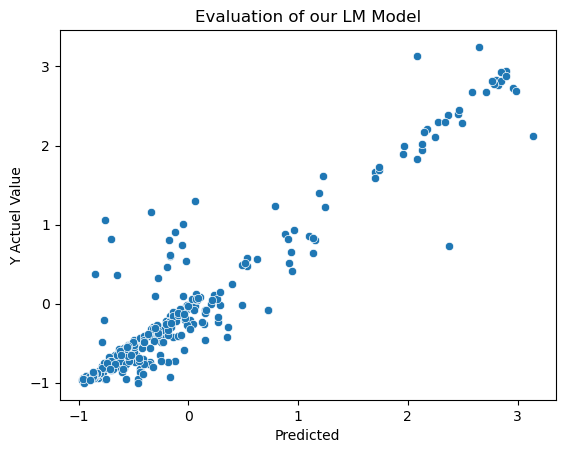

In [42]:
scatter_plot=sns.scatterplot(x=predicition_df["Predicted"],y=predicition_df['Y Actuel Value'],data=predicition_df)
scatter_plot.set_title('Evaluation of our LM Model')